## 1.加载数据，初步观察

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"telecom_users.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.shape

(5986, 22)

In [5]:
# 观察各特征的类型，是否有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


各特征含义为：customerID：用户ID；
gender：性别（Female & Male）；
SeniorCitizen：老年用户（1表示是，0表示不是）；
Partner：伴侣用户（Yes or No）；
Dependents：亲属用户（Yes or No）；
tenure：在网时长（0-72月）；
PhoneService：是否开通电话服务业务（Yes or No）；
MultipleLines：是否开通了多线业务（Yes 、No or No phoneservice 三种）；
InternetService：是否开通互联网服务 （No, DSL数字网络，fiber optic光纤网络 三种）；
OnlineSecurity：是否开通网络安全服务（Yes，No，No internetserive 三种）；
OnlineBackup：是否开通在线备份业务（Yes，No，No internetserive 三种）；
DeviceProtection：是否开通了设备保护业务（Yes，No，No internetserive 三种）；
TechSupport：是否开通了技术支持服务（Yes，No，No internetserive 三种）；
StreamingTV：是否开通网络电视（Yes，No，No internetserive 三种）；
StreamingMovies：是否开通网络电影（Yes，No，No internetserive 三种）；
Contract：签订合同方式 （按月，一年，两年）；
PaperlessBilling：是否开通电子账单（Yes or No）；
PaymentMethod：付款方式（bank transfer，credit card，electronic check，mailed check）；
MonthlyCharges：月费用；
TotalCharges：总费用；
Churn：该用户是否流失（Yes or No）。

In [6]:
# 观察是否有重复值
df.customerID.duplicated().sum()

0

In [7]:
# 观察特征的取值情况
df.nunique()

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

In [8]:
# 观察下各对象型特征的取值
print('gender : ', set(df['gender']))
print('Partner : ', set(df['Partner']))
print('Dependents : ', set(df['Dependents']))
print('PhoneService : ', set(df['PhoneService']))
print('MultipleLines : ', set(df['MultipleLines']))
print('InternetService : ', set(df['InternetService']))
print('OnlineSecurity : ', set(df['OnlineSecurity']))
print('OnlineBackup : ', set(df['OnlineBackup']))
print('DeviceProtection : ', set(df['DeviceProtection']))
print('TechSupport : ', set(df['TechSupport']))
print('StreamingTV : ', set(df['StreamingTV']))
print('StreamingMovies : ', set(df['StreamingMovies']))
print('Contract : ', set(df['Contract']))
print('PaperlessBilling : ', set(df['PaperlessBilling']))
print('PaymentMethod : ', set(df['PaymentMethod']))
print('Churn : ', set(df['Churn']))

gender :  {'Female', 'Male'}
Partner :  {'No', 'Yes'}
Dependents :  {'No', 'Yes'}
PhoneService :  {'No', 'Yes'}
MultipleLines :  {'No', 'Yes', 'No phone service'}
InternetService :  {'No', 'Fiber optic', 'DSL'}
OnlineSecurity :  {'No', 'Yes', 'No internet service'}
OnlineBackup :  {'No', 'Yes', 'No internet service'}
DeviceProtection :  {'No', 'Yes', 'No internet service'}
TechSupport :  {'No', 'Yes', 'No internet service'}
StreamingTV :  {'No', 'Yes', 'No internet service'}
StreamingMovies :  {'No', 'Yes', 'No internet service'}
Contract :  {'Two year', 'One year', 'Month-to-month'}
PaperlessBilling :  {'No', 'Yes'}
PaymentMethod :  {'Electronic check', 'Mailed check', 'Credit card (automatic)', 'Bank transfer (automatic)'}
Churn :  {'No', 'Yes'}


## 2.流失用户与非流失用户特征分析

### 2.1流失用户与非流失用户的个人信息对比

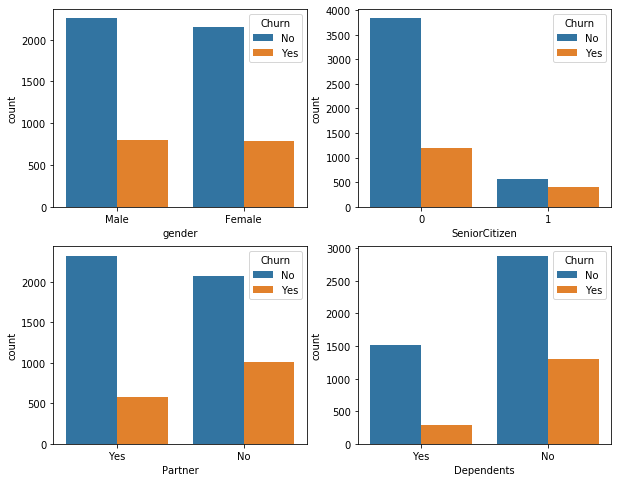

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(x='gender', data=df, hue='Churn', ax=axes[0][0])
sns.countplot(x='SeniorCitizen', data=df, hue='Churn', ax=axes[0][1])
sns.countplot(x='Partner', data=df, hue='Churn', ax=axes[1][0])
sns.countplot(x='Dependents', data=df, hue='Churn', ax=axes[1][1])

### 2.2流失用户与非流失用户的服务订阅信息对比

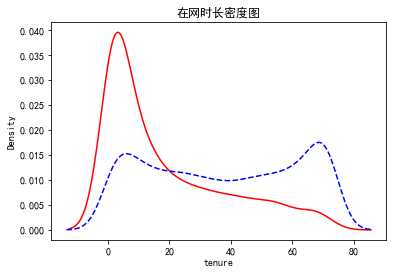

In [10]:
plt.rc('font', family='SimHei')
plt.title("在网时长密度图")
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], color='r', linestyle='-', label='Churn:Yes')
ax1 = sns.kdeplot(df[df['Churn'] == 'No']['tenure'], color='b', linestyle='--', label='Churn:No')

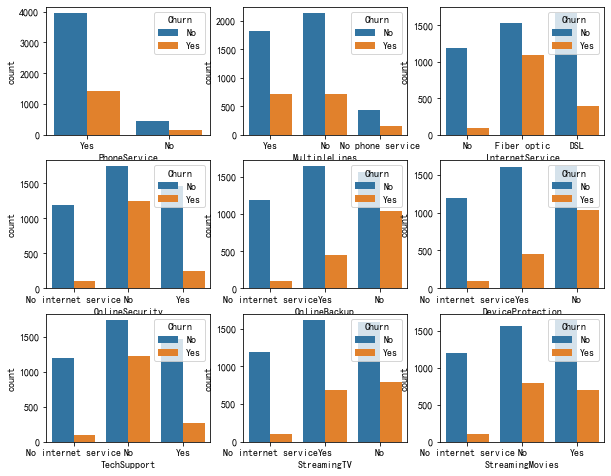

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
sns.countplot(x='PhoneService', data=df, hue='Churn', ax=axes[0][0])
sns.countplot(x='MultipleLines', data=df, hue='Churn', ax=axes[0][1])
sns.countplot(x='InternetService', data=df, hue='Churn', ax=axes[0][2])
sns.countplot(x='OnlineSecurity', data=df, hue='Churn', ax=axes[1][0])
sns.countplot(x='OnlineBackup', data=df, hue='Churn', ax=axes[1][1])
sns.countplot(x='DeviceProtection', data=df, hue='Churn', ax=axes[1][2])
sns.countplot(x='TechSupport', data=df, hue='Churn', ax=axes[2][0])
sns.countplot(x='StreamingTV', data=df, hue='Churn', ax=axes[2][1])
sns.countplot(x='StreamingMovies', data=df, hue='Churn', ax=axes[2][2])

### 2.3流失用户与非流失用户帐单信息对比

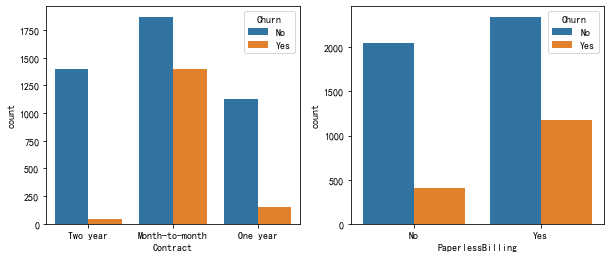

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='Contract', data=df, hue='Churn', ax=axes[0])
sns.countplot(x='PaperlessBilling', data=df, hue='Churn', ax=axes[1])

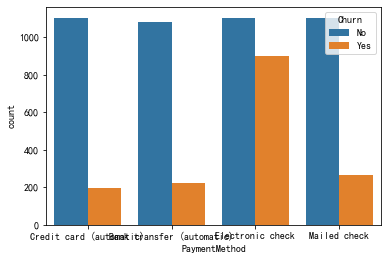

In [13]:
sns.countplot(x='PaymentMethod', data=df, hue='Churn')

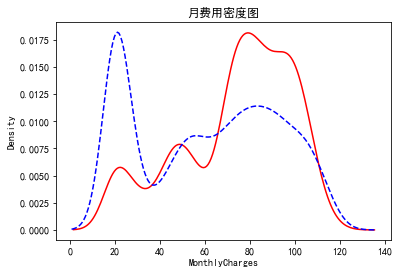

In [14]:
plt.title("月费用密度图")
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color='r', linestyle='-', label='Churn:Yes')
ax1 = sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], color='b', linestyle='--', label='Churn:No')

In [15]:
# 尝试转化为数值
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="raise")

ValueError: Unable to parse string " " at position 356

In [17]:
# 根据报错提示，观察下空格字符串的分布
df[df.TotalCharges == " "]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [18]:
# 用0代替空字符串，重新尝试
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="raise")

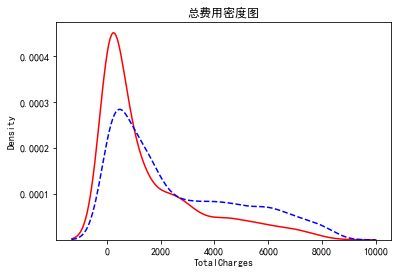

In [19]:
plt.title("总费用密度图")
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], color='r', linestyle='-', label='Churn:Yes')
ax1 = sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], color='b', linestyle='--', label='Churn:No')

## 3.分类预测

### 3.1 编码，提取特征

In [20]:
df_clu = df.drop(['Unnamed: 0', 'customerID', 'Churn'], axis=1)
labels = df['Churn']

In [21]:
# 二值对象型特征转换成数值型
df_clu['gender'] = df_clu['gender'].replace('Male', 1).replace('Female', 0)
df_clu['Partner'] = df_clu['Partner'].replace('Yes', 1).replace('No', 0)
df_clu['Dependents'] = df_clu['Dependents'].replace('Yes', 1).replace('No', 0)
df_clu['PhoneService'] = df_clu['PhoneService'].replace('Yes', 1).replace('No', 0)
df_clu['PaperlessBilling'] = df_clu['PaperlessBilling'].replace('Yes', 1).replace('No', 0)
labels = labels.replace('Yes', 1).replace('No', 0)

In [22]:
# 离散的，可用距离度量的对象型特征转化为数值型
df_clu['Contract'] = df_clu['Contract'].replace("Month-to-month", 1).replace("One year", 12).replace("Two year", 24)

In [23]:
# 离散的，不宜用距离度量的特征用one-hot编码
df_clu = pd.get_dummies(df_clu)
df_clu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5986 non-null   int64  
 1   SeniorCitizen                            5986 non-null   int64  
 2   Partner                                  5986 non-null   int64  
 3   Dependents                               5986 non-null   int64  
 4   tenure                                   5986 non-null   int64  
 5   PhoneService                             5986 non-null   int64  
 6   Contract                                 5986 non-null   int64  
 7   PaperlessBilling                         5986 non-null   int64  
 8   MonthlyCharges                           5986 non-null   float64
 9   TotalCharges                             5986 non-null   float64
 10  MultipleLines_No                         5986 no

In [24]:
df_clu.max()

gender                                        1.00
SeniorCitizen                                 1.00
Partner                                       1.00
Dependents                                    1.00
tenure                                       72.00
PhoneService                                  1.00
Contract                                     24.00
PaperlessBilling                              1.00
MonthlyCharges                              118.75
TotalCharges                               8684.80
MultipleLines_No                              1.00
MultipleLines_No phone service                1.00
MultipleLines_Yes                             1.00
InternetService_DSL                           1.00
InternetService_Fiber optic                   1.00
InternetService_No                            1.00
OnlineSecurity_No                             1.00
OnlineSecurity_No internet service            1.00
OnlineSecurity_Yes                            1.00
OnlineBackup_No                

In [25]:
# 数据归一化
df_clu['tenure'] = ( df_clu['tenure'] - df_clu['tenure'].min() )/( df_clu['tenure'].max() - df_clu['tenure'].min() )
df_clu['Contract'] = ( df_clu['Contract'] - df_clu['Contract'].min() )/( df_clu['Contract'].max() - df_clu['Contract'].min() )
df_clu['MonthlyCharges'] = ( df_clu['MonthlyCharges'] - df_clu['MonthlyCharges'].min() )/( df_clu['MonthlyCharges'].max() - df_clu['MonthlyCharges'].min() )
df_clu['TotalCharges'] = ( df_clu['TotalCharges'] - df_clu['TotalCharges'].min() )/( df_clu['TotalCharges'].max() - df_clu['TotalCharges'].min() )

### 3.2 保持法切分训练集和验证集 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 将数据集分成训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(df_clu, labels, test_size=0.3, random_state = 1026)

### 3.3 建模并验证 

In [27]:
# 多项式朴素贝叶斯模型
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7188195991091314
Area under the ROC curve:  0.7473279852645354
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1331
           1       0.47      0.81      0.60       465

    accuracy                           0.72      1796
   macro avg       0.69      0.75      0.69      1796
weighted avg       0.80      0.72      0.74      1796



In [28]:
# 高期朴素贝叶斯模型
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.6765033407572383
Area under the ROC curve:  0.7341694739988528
              precision    recall  f1-score   support

           0       0.92      0.61      0.74      1331
           1       0.44      0.85      0.58       465

    accuracy                           0.68      1796
   macro avg       0.68      0.73      0.66      1796
weighted avg       0.80      0.68      0.70      1796



In [29]:
# 逻辑回归模型
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', penalty='l1')
'''
solver：一个字符串，指定了求解最优化问题的算法，可以为如下的值:
'newton-cg'：使用牛顿法。
'lbfgs'：使用L-BFGS拟牛顿法。
'liblinear' ：使用 liblinear。
'sag'：使用 Stochastic Average Gradient descent 算法。
'''
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.8051224944320713
Area under the ROC curve:  0.7223011237407398
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1331
           1       0.64      0.55      0.59       465

    accuracy                           0.81      1796
   macro avg       0.75      0.72      0.73      1796
weighted avg       0.80      0.81      0.80      1796



In [30]:
# 决策树模型
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7293986636971047
Area under the ROC curve:  0.6600179346113764
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1331
           1       0.48      0.52      0.50       465

    accuracy                           0.73      1796
   macro avg       0.65      0.66      0.66      1796
weighted avg       0.74      0.73      0.73      1796



In [31]:
# 决策树模型给出的特征重要性
model.feature_importances_

array([0.02322879, 0.02063264, 0.02375014, 0.0152112 , 0.12230143,
       0.00388557, 0.17088786, 0.02066956, 0.19023171, 0.18830981,
       0.00897204, 0.0022027 , 0.00891221, 0.01600733, 0.01035745,
       0.        , 0.04292871, 0.        , 0.0018318 , 0.01291372,
       0.        , 0.00443179, 0.01089449, 0.        , 0.00773785,
       0.01677563, 0.        , 0.00582868, 0.00720027, 0.        ,
       0.00477926, 0.00449029, 0.        , 0.01037334, 0.00767814,
       0.00948928, 0.01720337, 0.00988292])

In [32]:
# 随机森林模型
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.8023385300668151
Area under the ROC curve:  0.6980352714023734
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1331
           1       0.66      0.48      0.56       465

    accuracy                           0.80      1796
   macro avg       0.75      0.70      0.72      1796
weighted avg       0.79      0.80      0.79      1796



In [33]:
# 随机森林模型给出的特征重要性
model.feature_importances_

array([3.01281451e-02, 2.01319042e-02, 2.14966801e-02, 1.82703990e-02,
       1.56482488e-01, 5.09500664e-03, 9.06267950e-02, 2.69458508e-02,
       1.45634808e-01, 1.49891439e-01, 1.54887028e-02, 4.17469097e-03,
       1.27669186e-02, 1.13964690e-02, 1.28625344e-02, 4.90233947e-05,
       4.38134607e-02, 4.16097712e-06, 8.35579689e-03, 2.28201926e-02,
       8.09411722e-05, 1.38272937e-02, 1.36945999e-02, 5.41931768e-03,
       1.03126814e-02, 2.58567729e-02, 8.60599246e-04, 9.59589488e-03,
       1.06878894e-02, 4.05060901e-04, 1.10655198e-02, 1.32985979e-02,
       9.77439731e-03, 8.49530637e-03, 1.34015060e-02, 1.46550703e-02,
       2.93619778e-02, 1.27711075e-02])

In [34]:
# 装袋决策树模型
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators=10, random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7934298440979956
Area under the ROC curve:  0.6983212557459424
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1331
           1       0.63      0.50      0.56       465

    accuracy                           0.79      1796
   macro avg       0.73      0.70      0.71      1796
weighted avg       0.78      0.79      0.79      1796



In [35]:
# 极端随机树模型
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10, random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7639198218262806
Area under the ROC curve:  0.6581226824361988
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1331
           1       0.56      0.44      0.49       465

    accuracy                           0.76      1796
   macro avg       0.69      0.66      0.67      1796
weighted avg       0.75      0.76      0.75      1796



In [36]:
# 梯度提升树模型
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=10, random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7861915367483296
Area under the ROC curve:  0.6122827851966748
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1331
           1       0.76      0.25      0.38       465

    accuracy                           0.79      1796
   macro avg       0.78      0.61      0.62      1796
weighted avg       0.78      0.79      0.74      1796



In [37]:
# 多层全连接层神经网络模型
import tensorflow as tf

tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(38,), kernel_initializer='random_uniform'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_uniform'),
    tf.keras.layers.Dense(1, activation='relu', kernel_initializer='random_uniform')
])

In [38]:
batch_size = 100 # 每批训练样本数（批梯度下降法）
tf_epoch = 10
tf_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
tf_model.summary()
tf_model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)), batch_size=batch_size, epochs=tf_epoch, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3900      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________
Train on 4190 samples, validate on 1796 samples
Epoch 1/10
4190/4190 [==============================] - 3s 831us/sample - loss: 0.1802 - accuracy: 0.7549 - val_loss: 0.1462 - val_accuracy: 0.7773
Epoch 2/10
4190/4190 [==============================] - 1s 190us/sample - loss: 0.1467 - accuracy: 0.7885 - val_loss: 0.1381 - val_accuracy: 0.7996
Epoch 3/10
4190/4190 [================

In [39]:
predictions = tf_model.predict(X_test)
predictions = list(np.round(predictions).reshape(-1,1))

print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.8034521158129176
Area under the ROC curve:  0.7379648255414717
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1331
           1       0.62      0.60      0.61       465

    accuracy                           0.80      1796
   macro avg       0.74      0.74      0.74      1796
weighted avg       0.80      0.80      0.80      1796

